<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Statistical_Time_Series_Analysis/16-Arch-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARCH Models

## 1. What is ARCH?

ARCH, which stands for Autoregressive Conditional Heteroskedasticity, is a model for forecasting the variance of a time series that is conditional on past errors. It was introduced by Robert Engle in 1982, for which he won the Nobel Prize in Economics. 

ARCH models are used particularly in financial time series analysis, where the goal is to model and predict future volatility based on past patterns of volatility. 

Unlike models that predict the actual values in a series, ARCH focuses on the variance of the series, forecasting periods of expected volatility — crucial for risk management and option pricing in financial markets.

## 2. What is Volatility (in Simple Terms)?

In finance and economics, **volatility** generally refers to the amount of uncertainty or risk about the size of changes in a security’s value or an economic time series. 

- If a time series has **high volatility**, it means its values (for example, returns on a stock) can change dramatically over a short time period in either direction.  
- If a time series has **low volatility**, its values change at a more steady rate and do not fluctuate widely.

In other words, volatility is a measure of how “spread out” or “variable” the data points are from their average value. A common numerical measure of volatility is the **variance** (or standard deviation) of returns (or changes in the data).

## 3. What is Heteroskedasticity?

Heteroskedasticity occurs when the variance of errors or the spread of residuals within a dataset is not consistent across all levels of an independent variable. In simple terms, it means that the size of the error differs across values of an independent variable. 

In the context of time series, heteroskedasticity often manifests as **volatility clustering** where periods of high volatility are followed by high volatility and periods of low volatility follow low volatility.

## 4. Implementation of ARCH Model

An ARCH(1) process is often used to model situations where volatility *clusters*—that is, large fluctuations tend to be followed by large fluctuations, and small fluctuations tend to be followed by small fluctuations.

An **ARCH(1)** process can be described with:

$$
\begin{align}
\sigma_t^2 &= \alpha_0 + \alpha_1 \epsilon_{t-1}^2, \\
\epsilon_t &= \sigma_t \, z_t, \quad z_t \sim \mathcal{N}(0,1).
\end{align}
$$


- $( \sigma_t^2 )$ is the conditional variance at time $ t $.  
- $( \epsilon_t )$ is the time series (often interpreted as returns or residuals from some mean process).  
- $( z_t )$ is a standard normal white noise.  
- $( \alpha_0 )$ and $( \alpha_1 )$ are parameters (positive constants to ensure variance stays positive).

### Steps to Generate Data

1. Choose parameter values $( \alpha_0 )$ and $( \alpha_1 )$.  
2. Initialize $( \epsilon_0 )$ to zero or a small number.  
3. For $ t = 1 $ to $ T $ (where $ T $ is the length of the series):
    - Compute $ \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 $.
    - Draw $ z_t $ from a standard Normal(0,1) distribution.
    - Compute $ \epsilon_t = \sigma_t \times z_t $.

Below is a Python code snippet that accomplishes these steps and plots the resulting synthetic time series and its volatility $( \sigma_t )$.

Fitted ARCH(1) parameters:
 omega       0.100542
alpha[1]    0.714048
Name: params, dtype: float64

Model summary:
                         Zero Mean - ARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -629.551
Distribution:                  Normal   AIC:                           1263.10
Method:            Maximum Likelihood   BIC:                           1272.92
                                        No. Observations:                 1000
Date:                Thu, Jan 02 2025   Df Residuals:                     1000
Time:                        20:28:03   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------

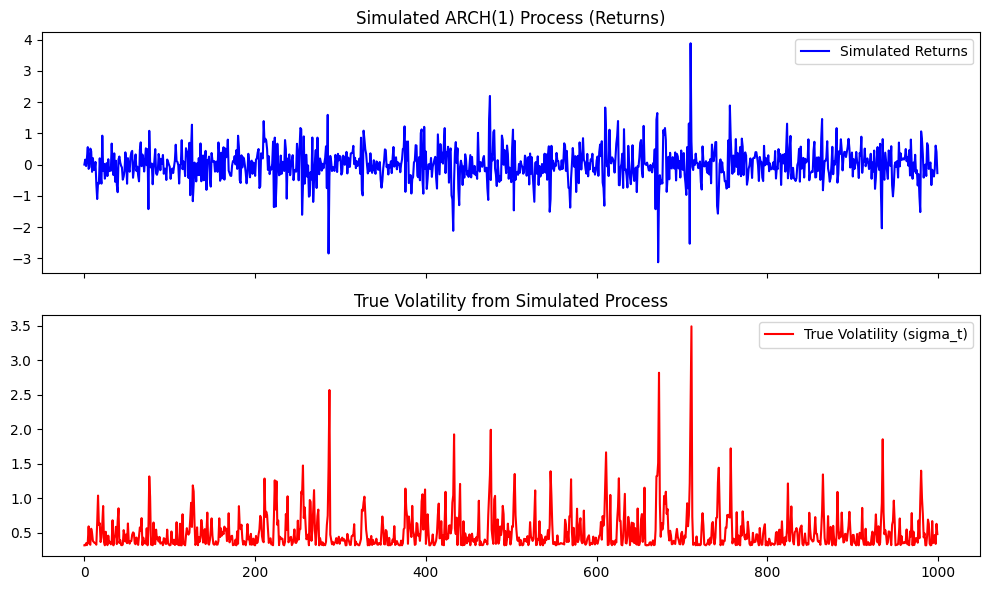

True alpha0 = 0.1, Estimated alpha0 = 0.1005
True alpha1 = 0.8, Estimated alpha1 = 0.7140


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# If you don't have 'arch' library installed, you can install via: pip install arch
from arch import arch_model

def simulate_arch1(T=1000, alpha0=0.1, alpha1=0.8, random_seed=42):
    """
    Simulate an ARCH(1) process of length T, using:
        sigma_t^2 = alpha0 + alpha1 * epsilon_{t-1}^2
        epsilon_t = sigma_t * z_t,  z_t ~ N(0,1)
    
    Returns:
        epsilon (np.array): The simulated time series of length T
        sigma (np.array): The conditional standard deviation (volatility) at each time step
    """
    np.random.seed(random_seed)
    
    # Pre-allocate arrays
    epsilon = np.zeros(T)
    sigma = np.zeros(T)
    
    # Initialize epsilon_0 (you can start from zero or a small random value)
    epsilon[0] = 0.0
    sigma[0] = np.sqrt(alpha0)  # because sigma_0^2 = alpha0 + alpha1*epsilon_{-1}^2, we assume epsilon_{-1} = 0
    
    # Generate data
    for t in range(1, T):
        sigma[t] = np.sqrt(alpha0 + alpha1 * epsilon[t-1]**2)
        z_t = np.random.randn()  # Draw from Normal(0,1)
        epsilon[t] = sigma[t] * z_t
    
    return epsilon, sigma

def main():
    # 1. Simulate ARCH(1) data
    T = 1000
    alpha0_true = 0.1
    alpha1_true = 0.8
    
    returns, volatility = simulate_arch1(T=T, alpha0=alpha0_true, alpha1=alpha1_true, random_seed=42)
    
    # 2. Put the returns into a pandas Series (arch_model expects a series-like object)
    returns_series = pd.Series(returns)
    
    # 3. Fit an ARCH(1) model using the 'arch' library
    # p=1 for ARCH(1), q=0 for GARCH(0)
    arch_mod = arch_model(returns_series, p=1, q=0, mean='zero', vol='ARCH')
    res = arch_mod.fit(disp='off')
    
    # 4. Print the estimation results
    print("Fitted ARCH(1) parameters:\n", res.params)
    print("\nModel summary:\n", res.summary())
    
    # 5. Plot the simulated returns and volatility
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    axes[0].plot(returns, label="Simulated Returns", color='blue')
    axes[0].set_title("Simulated ARCH(1) Process (Returns)")
    axes[0].legend()
    
    axes[1].plot(volatility, label="True Volatility (sigma_t)", color='red')
    axes[1].set_title("True Volatility from Simulated Process")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 6. Compare true alpha0 and alpha1 to the estimated parameters
    print(f"True alpha0 = {alpha0_true}, Estimated alpha0 = {res.params['omega']:.4f}")
    print(f"True alpha1 = {alpha1_true}, Estimated alpha1 = {res.params['alpha[1]']:.4f}")

if __name__ == "__main__":
    main()

## 5. Interpretation of Results

### 6.1 Recap of the Fitted Model

We used an **ARCH(1)** model of the form:

$$
\sigma_t^2 = \omega + \alpha_1 \, \epsilon_{t-1}^2,
$$

where:

- $(\omega \; (\text{“omega”}))$ is analogous to $\alpha_0$ in some ARCH notations.  
- $(\alpha_1 \; (\text{“alpha[1]”}))$ represents the effect of last period’s **squared** shock (error) on today’s variance.

From the output, the fitted parameters are:  
- $\omega \approx 0.1005$  
- $\alpha[1] \approx 0.7140$


### 6.2 Significance of Parameter Estimates

1. **$\omega \approx 0.1005$**  
   - This value represents the baseline or “long-run” variance level if $\epsilon_{t-1}^2$ is small.  
   - A positive, statistically significant \(\omega\) (with a large t-statistic and very small p-value) indicates that the model requires a positive constant variance component to capture overall volatility in the data.

2. **$(\alpha[1] \approx 0.7140)$**  
   - This is the coefficient that multiplies the previous period’s squared shock.  
   - A relatively high $(\alpha_1)$ (between 0 and 1) suggests that large shocks (big $\epsilon_{t-1}^2$) have a strong influence on today’s volatility.  
   - The t-statistic is also quite high (10.509) with a very small p-value, indicating that $(\alpha[1])$ is highly significant.


### 6.3 Confidence Intervals

- The 95% confidence interval for $(\alpha[1])$ is approximately $[0.581, 0.847]$.  
- This interval does not include zero, reinforcing that $(\alpha[1])$ is indeed significantly positive.  
- It also stays below 1, which is good news for model stationarity (in an ARCH(1) model, $(\alpha_1 < 1)$ is typically required for a stationary variance).


### 6.4 Goodness of Fit Metrics

- **Log-Likelihood**: $(-629.551)$  
- **AIC**: $(1263.10)$  
- **BIC**: $(1272.92)$  

These are standard information criteria for comparing models. Lower AIC/BIC is generally better. In practice, one might compare this model to alternative specifications (e.g., **GARCH(1,1)** or higher-order ARCH) to see if the volatility dynamics are captured more effectively.



### 6.5 Practical Interpretation

- Since $(\alpha_1 \approx 0.71)$, the volatility tends to be quite “sticky,” meaning a large shock to returns one day can lead to a higher variance (volatility) the next day. However, the effect will slowly decay if there are no further large shocks.  
- The estimate for $(\omega \approx 0.10)$ suggests that, even when shocks are small, there is still a baseline level of variance around 0.1.


### 6.6 Alignment with the True Simulated Values

You mentioned that your **true** parameters in the simulation were around:
- $\alpha_0 = 0.1$ (i.e., $\omega$ in this notation)  
- $\alpha_1 = 0.8$

The fitted estimates:  
- $\omega = 0.1005$ (very close to 0.1)  
- $\alpha[1] = 0.7140$ (a bit lower than 0.8, but still in the ballpark)

Given random variation and sample size, these estimates are **reasonably close**. In a real-world scenario—or with a different random seed—you might see slightly different values. The fact that $\alpha_1$ is somewhat less than 0.8 could reflect sampling noise over 1000 data points or the iterative fitting process converging to a local maximum of the likelihood.


### 6.7 Next Steps

- **Extend to GARCH(1,1)**: You might want to see if adding a GARCH term (which accounts for persistently high variance) improves the model fit. This is done by setting `p=1` and `q=1` in `arch_model()`.  
- **Diagnostic Checks**:  
  1. Check the standardized residuals ( $(\epsilon_t / \sigma_t)$ ) to see if they look like white noise.  
  2. Look at the autocorrelation function (ACF) and partial autocorrelation function (PACF) of both residuals and squared residuals to confirm that ARCH-type effects are captured.  

Overall, these results show a **significant ARCH effect**, with higher volatility following large shocks. The model captures the main idea of volatility clustering, as intended.

## 7. Practical Considerations

In applying ARCH models to real-world data, there are several considerations:

- **Stationarity**: ARCH models should be applied to stationary series. Non-stationary data can be transformed using differencing or taking logarithms.
- **Model Order**: The order (q) of an ARCH model should be determined based on the autocorrelation of squared residuals.
- **Mean Equation**: Often, ARCH models are used in tandem with an ARMA model for the mean equation. This combined approach is known as ARMA-GARCH.

Some of the real-time examples where ARCH model(s) applied: Stock prices, oil prices, bond prices, inflation rates, GDP, unemployment rates, etc.